<a href="https://colab.research.google.com/github/adityakalra581/Data-Science/blob/master/Deep%20Learning/Convolutional-Neural-Networks/Mask-vs-No-mask/Mask-vs-No-mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Binary Image Classification Problem.

- Will try to build a high accuracy Image CLassifier using Keras modelling.
- Will evaluate the performance using Confusion Matrix.
- Then will check on random images that whether the model works on the images that have not been seen by it yet. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

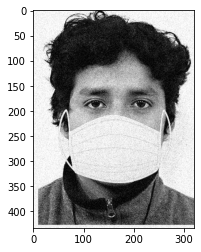

In [2]:
datadir = "dataset"
categories = ["with_mask" , "without_mask"]

for category in categories:
  path = os.path.join(datadir, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    # plt.imshow(img_array, cmap= plt.cm.binary)
    plt.show()
    break
  break

In [3]:
print(img_array)

[[229 248 253 ... 236 239 234]
 [234 254 252 ... 242 239 231]
 [230 253 249 ... 250 248 242]
 ...
 [238 250 254 ... 243 248 255]
 [255 252 247 ... 246 247 245]
 [255 242 210 ... 235 243 254]]


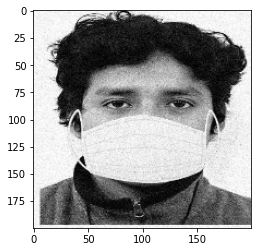

In [4]:
## Standardizing the size of every image.

IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
# plt.imshow(new_array, cmap= plt.cm.binary)
plt.show()

## Preparing Training Data

In [0]:
training_data = []
datadir = "dataset"
categories = ["with_mask" , "without_mask"]

def create_training_data():
  for category in categories:
    path = os.path.join(datadir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except:
        pass
create_training_data()

In [7]:

training_data = np.array(training_data)
print(training_data.shape)

(1376, 2)


In [0]:
import random

np.random.shuffle(training_data)
for sample in training_data[:10]:
  print(sample[1])

In [0]:
X = []
y = []

for features,label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
print(X.shape)
print(y.shape)

(1376, 200, 200, 1)
(1376,)


In [12]:
print(np.unique(y, return_counts = True))
# This must be the answer.
# (array([0, 1]), array([690, 686]))
## If not something is not correct.
## Rerun the cells and check again.
## 690 : With_mask Images
## 686 : Without_mask Images


(array([0, 1]), array([690, 686]))


## Initiation:

- Upload X.pickle and y.pickle in the files directory.
- Once pickle file is completed, Just run the cells from down here.
- Runnning above cells won't work without dataset.


In [0]:
# import pickle

# pickle_out = open("X.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

- Now there is no need to load the dataset again and again.
- Upload X.pickle and y.pickle
- Just run the below cell and X and y will be ready.
- X has features and y has labels.

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [0]:
# import pickle

# pickle_in = open("X.pickle", "rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle", "rb")
# y = pickle.load(pickle_in)

In [0]:
X = X/255.0

In [17]:
import numpy as np
import random

np.random.shuffle(y)
print(y[1:10])

[0 0 1 0 1 0 0 0 0]


In [0]:
## Train Test Split:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
print("Shape of test_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_test.shape)
print("Shape of test_y: ",y_test.shape)

Shape of test_x:  (921, 200, 200, 1)
Shape of train_y:  (921,)
Shape of test_x:  (455, 200, 200, 1)
Shape of test_y:  (455,)


In [20]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([455, 466]))
(array([0, 1]), array([235, 220]))


In [0]:
# train_x = tf.keras.utils.normalize(X_train,axis=1)
# test_x = tf.keras.utils.normalize(X_test, axis=1)

In [22]:


model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("softmax"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

model.fit(X_train,y_train, batch_size=20, epochs = 5, validation_split=0.1)


Epoch 1/5
42/42 [==============================] - 1s 29ms/step - loss: 7.5325 - accuracy: 0.5060 - val_loss: 7.5426 - val_accuracy: 0.5054
Epoch 2/5
42/42 [==============================] - 1s 22ms/step - loss: 7.5325 - accuracy: 0.5060 - val_loss: 7.5426 - val_accuracy: 0.5054
Epoch 3/5
42/42 [==============================] - 1s 22ms/step - loss: 7.5325 - accuracy: 0.5060 - val_loss: 7.5426 - val_accuracy: 0.5054
Epoch 4/5
42/42 [==============================] - 1s 22ms/step - loss: 7.5325 - accuracy: 0.5060 - val_loss: 7.5426 - val_accuracy: 0.5054
Epoch 5/5
42/42 [==============================] - 1s 22ms/step - loss: 7.5325 - accuracy: 0.5060 - val_loss: 7.5426 - val_accuracy: 0.5054


In [23]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

15/15 [==============================] - 0s 13ms/step - loss: 7.8760 - accuracy: 0.4835
7.875979900360107
0.48351648449897766


In [24]:
predictions = model.predict(X_test)
predictions[1:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [25]:
y_test[1:10]

array([0, 1, 1, 1, 0, 0, 1, 1, 1])

## Confusion Matrix.

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(y_true = y_test, y_pred = predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cm_plot_labels = ['Mask','No Mask']

Confusion matrix, without normalization
[[  0 235]
 [  0 220]]


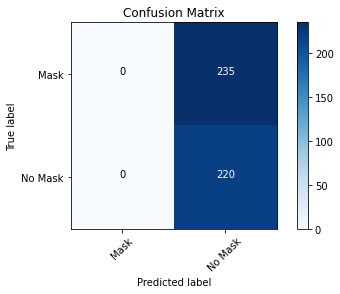

In [30]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [0]:
def prepare(filepath):
  IMG_SIZE = 200
  img_array = cv2.imread(filepath, cv2.IMREAD_REDUCED_GRAYSCALE_2)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)




In [0]:
# prediction = model.predict([prepare("photo.jpeg")])
# # print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("photo.jpeg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap="gray")
# plt.show()

In [0]:
# prediction = model.predict([prepare("7.jpg")])
# # print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("7.jpg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap="gray")
# plt.show()

In [0]:
# prediction = model.predict([prepare("a15.jpg")])
# print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("a15.jpg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap="gray")
# plt.show()

In [0]:
# prediction = model.predict([prepare("a2.jpg")])
# print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("a2.jpg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap="gray")
# plt.show()

In [0]:
# prediction = model.predict([prepare("mask.jpeg")])
# print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("mask.jpeg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap= "gray")
# plt.show()

In [0]:
# prediction = model.predict([prepare("mask2.jpg")])
# print(categories[int(prediction[0][0])])
# # print(prediction)
# img_array = cv2.imread("mask2.jpg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap= "gray")
# plt.show()

In [0]:
# prediction = model.predict([prepare("mask3.jpeg")])
# print(categories[int(prediction[0][0])])
# # print(prediction)
# img_array = cv2.imread("mask3.jpeg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap= "gray")
# plt.show()

## Trying a new Model

In [0]:
# cnn_mod = tf.keras.models.Sequential([
#             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',
#                             input_shape= X_train.shape[1:]),
#             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#             tf.keras.layers.MaxPooling2D(2,2),
#             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#             tf.keras.layers.MaxPooling2D(2,2),
#             tf.keras.layers.Dropout(0.25),
#             tf.keras.layers.Flatten(),
#             tf.keras.layers.Dense(128, activation=tf.nn.relu),
#             tf.keras.layers.Dense(1, activation=tf.nn.softmax)

# ])

# cnn_mod.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])


# cnn_mod.fit(X_train,y_train, epochs=5)
# val_loss, val_acc = cnn_mod.evaluate(X_test, y_test)
# print(val_loss)
# print(val_acc)

In [0]:
# prediction = cnn_mod.predict([prepare("a15.jpg")])
# # print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("a15.jpg", cv2.IMREAD_REDUCED_GRAYSCALE_2)
# plt.imshow(img_array, cmap="gray")
# plt.show()

In [0]:
# prediction = cnn_mod.predict([prepare("photo.jpeg")])
# # print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("photo.jpeg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap="gray")
# plt.show()

In [0]:
# prediction = cnn_mod.predict([prepare("a2.jpg")])
# # print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("a2.jpg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_array, cmap="gray")
# plt.show()

In [0]:
# prediction = cnn_mod.predict([prepare("mask.jpeg")])
# # print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("mask.jpeg", cv2.IMREAD_REDUCED_GRAYSCALE_2)
# plt.imshow(img_array, cmap= plt.cm.binary)
# plt.show()

In [0]:
# prediction = cnn_mod.predict([prepare("mask2.jpg")])
# # print(categories[int(prediction[0][0])])
# print(prediction)
# img_array = cv2.imread("mask2.jpg", cv2.IMREAD_REDUCED_GRAYSCALE_2)
# plt.imshow(img_array, cmap= plt.cm.binary)
# plt.show()